# Lecture 2  - Data analysis with Jupyter and pandas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 2.1 Jupyter Notebook Basics

There are two common cell types in Jupyter Notebook:

- Markdown
- Code

The first one is *Markdown*. You can use Markdown syntax to _stylize your text_. You can read more about the markdown syntax here: 

- <https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#html>
- <https://www.ibm.com/support/knowledgecenter/SSQNUZ_current/com.ibm.icpdata.doc/dsx/markd-jupyter.html>

Images can be added using HTML `<img>` tag.
<img src="https://jupyter.org/assets/main-logo.svg" width="200px"></img>

One of the most useful features of Jupyter is its built-in support for MathJax. 
$$
\begin{align}
y &= x^2 + 2x + 1 \\
z &= \sqrt{y^3 + 5}
\end{align}
$$

Read more about MathJax here: [https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference]

The second type is the Code cell. You can write Python code and run it from within the notebook. For example, type in the following code and run it below.

```
x = 10
print(x)
```

In [2]:
x = 10
print(x)

10


<div class="alert alert-block alert-success">
<b>Your Task:</b> 
<ul>
<li>Write a function sum_odd(n) that returns the sum of all odds numbers from $1$ to $n$ inclusively</li>
</ul>
</div>

In [3]:
def sum_odd(n):
    ans = 0
    for i in range(1,n+1):
        if i%2 != 0:
            ans += i
    return ans

What is `sum_odd(100)`?

In [4]:
sum_odd(100)

2500

You can use `Tab` and `Shift+Tab` for autocomplete and inline documentation.

In [5]:
import math

x = math.sqrt(10) # try to tab after typing in math.
y = len([1,2,3])  # try shift+tab on len()

### Magic functions

Jupyter has all kinds of magic functions. Here's an example of comparing `sum()` with a list comprehension to a generator comprehension using the `%time` magic.

In [6]:
%time sum([x for x in range(100000)])

CPU times: user 7.23 ms, sys: 2.46 ms, total: 9.69 ms
Wall time: 9.48 ms


4999950000

In [7]:
%time sum(x*x for x in range(100000))

CPU times: user 13.8 ms, sys: 484 µs, total: 14.3 ms
Wall time: 14 ms


333328333350000

## 2.2 pandas: Python Data Analysis Library

### What is it?

*Python has long been great for data munging and preparation, but less so for
data analysis and modeling. pandas helps fill this gap, enabling you to carry
out your entire data analysis workflow in Python without having to switch to a
more domain specific language like R.*

The heart of pandas is the DataFrame object for data manipulation. It features:

- a powerful index object
- data alignment
- handling of missing data
- aggregation with groupby
- data manipuation via reshape, pivot, slice, merge, join

In [8]:
import pandas as pd

### Series: labelled arrays

The pandas Series is the simplest datastructure to start with. It is a subclass
of ndarray that supports more meaninful indices.

#### Let's look at some creation examples for Series

In [9]:
values = [2.0, 1.0, 5.0, 0.97, 3.0, 10.0, 0.0599, 8.0]
ser = pd.Series(values)
print(ser)
print(len(ser))

0     2.0000
1     1.0000
2     5.0000
3     0.9700
4     3.0000
5    10.0000
6     0.0599
7     8.0000
dtype: float64
8


In [10]:
values = [2.0, 1.0, 5.0, 0.97, 3.0, 10.0, 0.0599, 8.0]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
ser = pd.Series(data=values, index=labels)
print(ser)

A     2.0000
B     1.0000
C     5.0000
D     0.9700
E     3.0000
F    10.0000
G     0.0599
H     8.0000
dtype: float64


In [11]:
movie_rating = {
    'age': 1,
    'gender': 'F',
    'genres': 'Drama',
    'movie_id': 1193,
    'occupation': 10,
    'rating': 5,
    'timestamp': 978300760,
    'title': "One Flew Over the Cuckoo's Nest (1975)",
    'user_id': 1,
    'zip': '48067'
    }
ser = pd.Series(movie_rating)
print(ser)

age                                                1
gender                                             F
genres                                         Drama
movie_id                                        1193
occupation                                        10
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
user_id                                            1
zip                                            48067
dtype: object


In [12]:
ser.index

Index(['age', 'gender', 'genres', 'movie_id', 'occupation', 'rating',
       'timestamp', 'title', 'user_id', 'zip'],
      dtype='object')

In [13]:
ser.values

array([1, 'F', 'Drama', 1193, 10, 5, 978300760,
       "One Flew Over the Cuckoo's Nest (1975)", 1, '48067'], dtype=object)

#### Series indexing

In [14]:
ser[0]

1

In [15]:
ser['gender']

'F'

#### Operations between Series with different index objects

In [16]:
ser_1 = pd.Series(data=[1,3,4], index=['A', 'B', 'C'])
ser_2 = pd.Series(data=[5,5,5], index=['A', 'G', 'C'])
print(ser_1 + ser_2)

A    6.0
B    NaN
C    9.0
G    NaN
dtype: float64


### DataFrame

The DataFrame is the 2-dimensional version of a Series.

#### Let's look at some creation examples for DataFrame

You can think of it as a spreadsheet whose columns are Series objects.

In [17]:
# build from a dict of equal-length lists
pd.DataFrame({'col_1': [0.12, 7, 45, 10], 'col_2': [0.9, 9, 34, 11]})

,col_1,col_2
0,0.12,0.9
1,7.00,9.0
2,45.00,34.0
3,10.00,11.0


You can explicitly set the column names and index values as well.

In [18]:
pd.DataFrame(data={'col_1': [0.12, 7, 45, 10], 'col_2': [0.9, 9, 34, 11]},
             columns=['col_1', 'col_2', 'col_3'])

,col_1,col_2,col_3
0,0.12,0.9,NaN
1,7.00,9.0,NaN
2,45.00,34.0,NaN
3,10.00,11.0,NaN


In [19]:
pd.DataFrame(data={'col_1': [0.12, 7, 45, 10], 'col_2': [0.9, 9, 34, 11]},
             columns=['col_1', 'col_2', 'col_3'],
             index=['obs1', 'obs2', 'obs3', 'obs4'])


,col_1,col_2,col_3
obs1,0.12,0.9,NaN
obs2,7.00,9.0,NaN
obs3,45.00,34.0,NaN
obs4,10.00,11.0,NaN


You can also think of it as a dictionary of Series objects.

In [20]:
movie_rating = {
    'gender': 'F',
    'genres': 'Drama',
    'movie_id': 1193,
    'rating': 5,
    'timestamp': 978300760,
    'user_id': 1,
    }

movie_rating2 = {
    'gender': 'M',
    'genres': 'Horro',
    'movie_id': 1194,
    'rating': 10,
    'timestamp': 978345660,
    'user_id': 2,
    }

ser_1 = pd.Series(movie_rating)
ser_2 = pd.Series(movie_rating2)
df = pd.DataFrame({'r_1': ser_1, 'r_2': ser_2})
df.columns.name = 'rating_events'
df.index.name = 'rating_data'
df

rating_events,r_1,r_2
rating_data,,
gender,F,M
genres,Drama,Horro
movie_id,1193,1194
rating,5,10
timestamp,978300760,978345660
user_id,1,2


In [21]:
df = df.T
df

rating_data,gender,genres,movie_id,rating,timestamp,user_id
rating_events,,,,,,
r_1,F,Drama,1193,5,978300760,1
r_2,M,Horro,1194,10,978345660,2


In [22]:
df.columns 

Index(['gender', 'genres', 'movie_id', 'rating', 'timestamp', 'user_id'], dtype='object', name='rating_data')

In [23]:
df.index

Index(['r_1', 'r_2'], dtype='object', name='rating_events')

In [24]:
df.values

array([['F', 'Drama', 1193, 5, 978300760, 1],
       ['M', 'Horro', 1194, 10, 978345660, 2]], dtype=object)

#### Adding/Deleting entries

In [25]:
df = pd.DataFrame({'r_1': ser_1, 'r_2': ser_2})
df.drop('genres', axis=0)

,r_1,r_2
rating_data,,
gender,F,M
movie_id,1193,1194
rating,5,10
timestamp,978300760,978345660
user_id,1,2


In [26]:
df.drop('r_1', axis=1)

,r_2
rating_data,
gender,M
genres,Horro
movie_id,1194
rating,10
timestamp,978345660
user_id,2


In [27]:
# careful with the order here
df['r_3'] = ['F', 'Drama', 1193, 5, 978300760, 1]
df

,r_1,r_2,r_3
rating_data,,,
gender,F,M,F
genres,Drama,Horro,Drama
movie_id,1193,1194,1193
rating,5,10,5
timestamp,978300760,978345660,978300760
user_id,1,2,1


In [28]:
df['r_4'] = pd.Series({
    'gender': 'M',
    'genres': 'Drama',
    'movie_id': 1193,
    'rating': 5,
    'timestamp': 978300760,
    'user_id': 1,
    })
df

,r_1,r_2,r_3,r_4
rating_data,,,,
gender,F,M,F,M
genres,Drama,Horro,Drama,Drama
movie_id,1193,1194,1193,1193
rating,5,10,5,5
timestamp,978300760,978345660,978300760,978300760
user_id,1,2,1,1


### DataFrame selecting and indexing

You can index into a column using it's label, or with dot notation


In [29]:
df = pd.DataFrame(data={'col_1': [0.12, 7, 45, 10], 'col_2': [0.9, 9, 34, 11]},
                  columns=['col_1', 'col_2', 'col_3'],
                  index=['obs1', 'obs2', 'obs3', 'obs4'])
df['col_1']

obs1     0.12
obs2     7.00
obs3    45.00
obs4    10.00
Name: col_1, dtype: float64

In [30]:
df.col_1

obs1     0.12
obs2     7.00
obs3    45.00
obs4    10.00
Name: col_1, dtype: float64

You can also use multiple columns to select a subset of them:

In [31]:
df[['col_2', 'col_1']]

,col_2,col_1
obs1,0.9,0.12
obs2,9.0,7.00
obs3,34.0,45.00
obs4,11.0,10.00


The .loc and .iloc methods let you index into certain rows, or even rows and columns:

In [32]:
df.loc['obs3']

col_1     45
col_2     34
col_3    NaN
Name: obs3, dtype: object

In [33]:
df.iloc[0]

col_1    0.12
col_2     0.9
col_3     NaN
Name: obs1, dtype: object

In [34]:
df.iloc[:2]

,col_1,col_2,col_3
obs1,0.12,0.9,NaN
obs2,7.00,9.0,NaN


### Example

In [35]:
df = pd.read_table("data/random_numbers.txt",header=None)
df.head() # show first 5 rows

,0
0,40
1,1
2,2
3,5
4,4


In [36]:
print("len=", len(df))
print("sum=", df[0].sum())

len= 9
sum= 194


Let's sum only numbers greater than 9

In [37]:
greater_than_nine = df[0] > 9
print(greater_than_nine)

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
Name: 0, dtype: bool


In [38]:
# select rows with number > 9 and sum them up
print(df[0][greater_than_nine].sum())

173


<div class="alert alert-block alert-warning">
<b>Check out:</b> 
<ul>
<li> Another pandas tutorial: <a href="https://pandas.pydata.org/pandas-docs/stable/10min.html">https://pandas.pydata.org/pandas-docs/stable/10min.html</a></li>
</ul>
</div>

### Basic Plotting

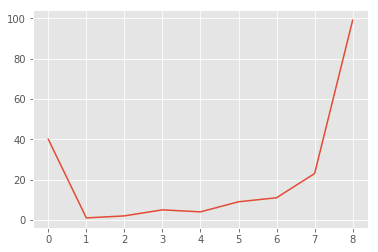

In [39]:
## bar char plotting
df[0].plot(kind='line')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd866a0>]],
      dtype=object)

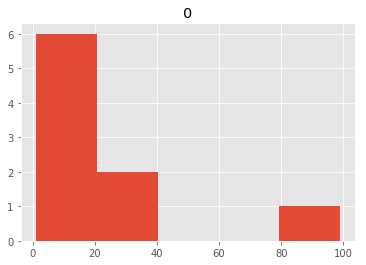

In [40]:
# histogram
df.hist(bins=5)

Text(0.5, 1.0, 'Foobar')

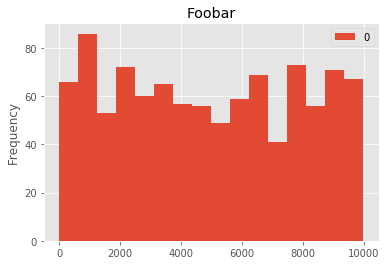

In [41]:
import numpy as np

n = 1000 # try vary this
df = pd.DataFrame(np.random.randint(0, 10000, n))
df.plot.hist(bins=16)
plt.title("Foobar")

## Thai weather dataset

In [42]:
weather_df = pd.read_csv("data/weather.csv")

In [43]:
weather_df.head()

,Unnamed: 0,stn_name,stncode,year,month,dday,maxtmp,mintmp,rain,avgrh,meantemp
0,0,Chiang Rai,303201,2001,1,1,29.5,13.0,0.0,76.0,21.2
1,1,Chiang Rai,303201,2001,1,2,30.0,12.3,0.0,75.0,21.1
2,2,Chiang Rai,303201,2001,1,3,30.5,12.4,0.0,74.0,21.4
3,3,Chiang Rai,303201,2001,1,4,30.4,12.9,0.0,75.0,21.6
4,4,Chiang Rai,303201,2001,1,5,30.3,13.2,0.0,76.0,21.7


In [44]:
# list all unique 'stncode' from 'stn_name' == 'Bangkok Metropolis'
weather_df[weather_df['stn_name'] == 'Bangkok Metropolis']['stncode'].unique()

array([455201])

In [45]:
# drop 'Unnamed: 0' col
weather_df = weather_df.drop('Unnamed: 0', axis=1)

In [46]:
weather_df.head()

,stn_name,stncode,year,month,dday,maxtmp,mintmp,rain,avgrh,meantemp
0,Chiang Rai,303201,2001,1,1,29.5,13.0,0.0,76.0,21.2
1,Chiang Rai,303201,2001,1,2,30.0,12.3,0.0,75.0,21.1
2,Chiang Rai,303201,2001,1,3,30.5,12.4,0.0,74.0,21.4
3,Chiang Rai,303201,2001,1,4,30.4,12.9,0.0,75.0,21.6
4,Chiang Rai,303201,2001,1,5,30.3,13.2,0.0,76.0,21.7


Let's select Satun's data from Feburary 2006

In [47]:
# select the weather data for Satun on Feb, 2006
satun_feb_2006 = weather_df[(weather_df["stn_name"]=="Satun") & (weather_df["year"] == 2006) & (weather_df["month"]==2)]
satun_feb_2006.head()

,stn_name,stncode,year,month,dday,maxtmp,mintmp,rain,avgrh,meantemp
288248,Satun,570201,2006,2,1,34.2,23.1,2.3,74.0,28.6
288249,Satun,570201,2006,2,2,34.2,23.7,0.0,67.0,28.9
288250,Satun,570201,2006,2,3,33.6,23.7,0.0,67.0,28.6
288251,Satun,570201,2006,2,4,34.1,24.4,0.0,66.0,29.2
288252,Satun,570201,2006,2,5,33.6,24.7,0.0,64.0,29.1


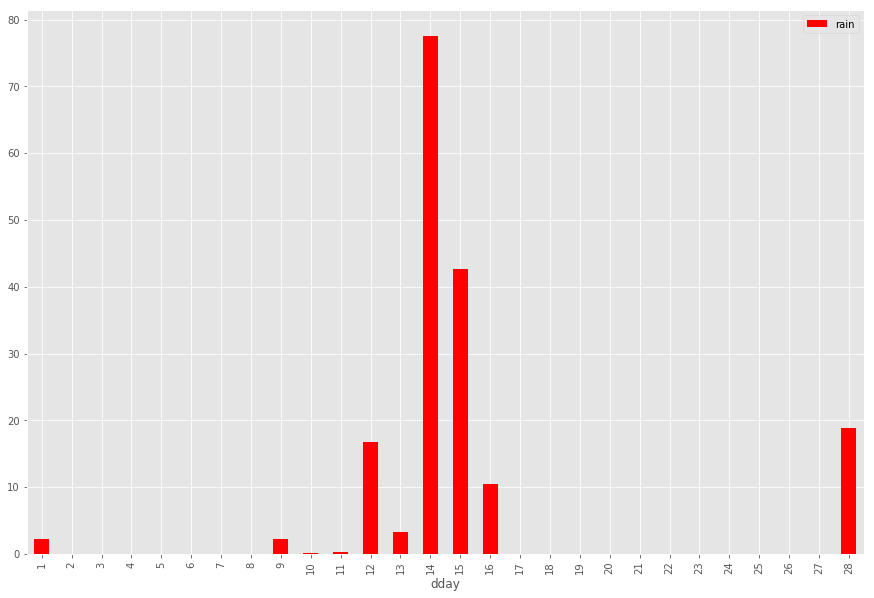

In [48]:
satun_feb_2006.plot(x="dday", y="rain", kind='bar', color='r', figsize=(15,10))

In [49]:
def c_to_f(c):
    return c/5.0*9.0+32

# instead of looping over the data set use .apply() instead
weather_df["meantemp_f"] = weather_df["meantemp"].apply(c_to_f)
weather_df.head()

,stn_name,stncode,year,month,dday,maxtmp,mintmp,rain,avgrh,meantemp,meantemp_f
0,Chiang Rai,303201,2001,1,1,29.5,13.0,0.0,76.0,21.2,70.16
1,Chiang Rai,303201,2001,1,2,30.0,12.3,0.0,75.0,21.1,69.98
2,Chiang Rai,303201,2001,1,3,30.5,12.4,0.0,74.0,21.4,70.52
3,Chiang Rai,303201,2001,1,4,30.4,12.9,0.0,75.0,21.6,70.88
4,Chiang Rai,303201,2001,1,5,30.3,13.2,0.0,76.0,21.7,71.06


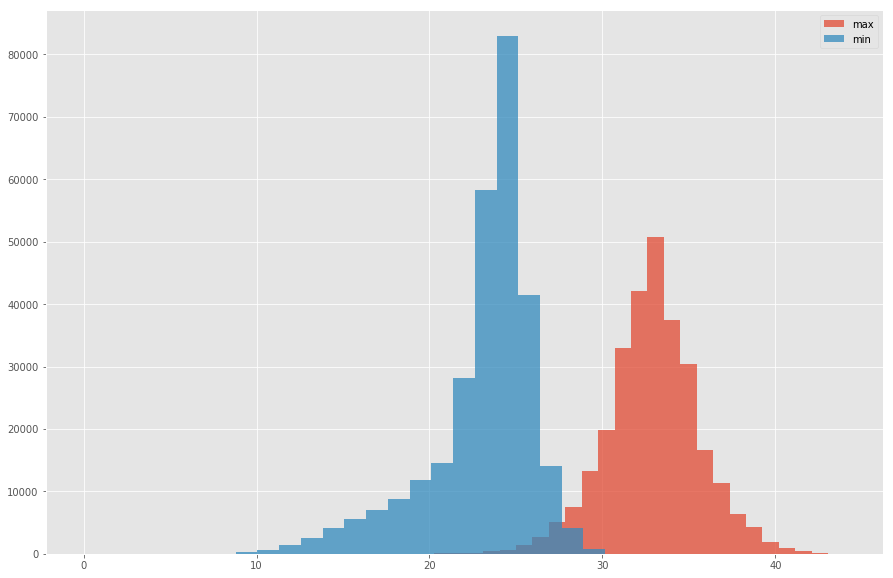

In [50]:
max_temp = weather_df["maxtmp"]
min_temp = weather_df['mintmp']
plt.figure(figsize=(15,10))
max_temp.hist(bins=30,alpha=0.75,label='max')
min_temp.hist(bins=30,alpha=0.75,label='min')
plt.legend()

### Q: Which province was coldest?

In [51]:
# grouping by stn_name but not readable yet
grouped_by_prov = weather_df.groupby("stn_name")
mean_temp_per_prov = grouped_by_prov["meantemp"].mean()
mean_temp_per_prov.head()

stn_name
Ayuttaya Agromet        28.285941
Bangkok Metropolis      29.147151
Burirum                 26.706442
Chacherngsao Agromet    27.494969
Chai Nat                28.095513
Name: meantemp, dtype: float64

In [85]:
# sort the list
mean_temp_per_prov.sort_values().head()

stn_name
Chiang Rai              25.110404
Phayao                  25.651449
Loei Agromet            25.744146
Sakon Nakhon Agromet    26.081315
Mae Hong Son            26.176934
Name: meantemp, dtype: float64

In [53]:
print(mean_temp_per_prov.idxmin(), mean_temp_per_prov.min())

Chiang Rai 25.11040383299112


### Q: Which province had the most rainfall?

In [54]:
grouped_by_prov = weather_df.groupby("stn_name")
total_rain_per_prov = grouped_by_prov["rain"].sum()
total_rain_per_prov.head()

stn_name
Ayuttaya Agromet        13229.1
Bangkok Metropolis      20760.3
Burirum                  9538.6
Chacherngsao Agromet    17086.3
Chai Nat                12202.8
Name: rain, dtype: float64

In [55]:
total_rain_per_prov.idxmax()

'Khlong Yai'

In [56]:
total_rain_per_prov.sort_values(ascending=False).head(20)

stn_name
Khlong Yai             59971.9
Ranong                 49510.9
Takua Pa               40639.1
Phriu Agromet          39309.6
Kamalasai              34983.2
Nakhon Si Thammarat    33271.3
Narathiwat             31854.3
Nakhon Phanom          29343.0
Yala Agromet           28479.0
Satun                  28197.1
Phuket                 26909.4
Kho Hong Agromet       26408.5
Trang Airport          25168.7
Phatthalung Agromet    25155.2
Sawi Agromet           24871.3
Surat Thani Agromet    23565.0
Pattani Airport        23144.9
Chiang Rai             21945.8
Prachin Buri           21693.2
Nong Khai              21498.2
Name: rain, dtype: float64

### Q: Which province has the most rainfall during the summer (March - April)?

In [57]:
summer_data = weather_df[(weather_df["month"]==3) | (weather_df["month"]==4)]
summer_rain_by_prov = summer_data.groupby("stn_name")["rain"].sum()

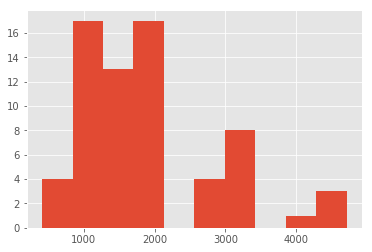

In [58]:
summer_rain_by_prov.hist() 

In [59]:
summer_rain_by_prov.sort_values(ascending=False).head(4)

stn_name
Satun                  4710.9
Takua Pa               4689.0
Khlong Yai             4399.2
Nakhon Si Thammarat    4125.6
Name: rain, dtype: float64

### Q: What is the average rainfall in each month?

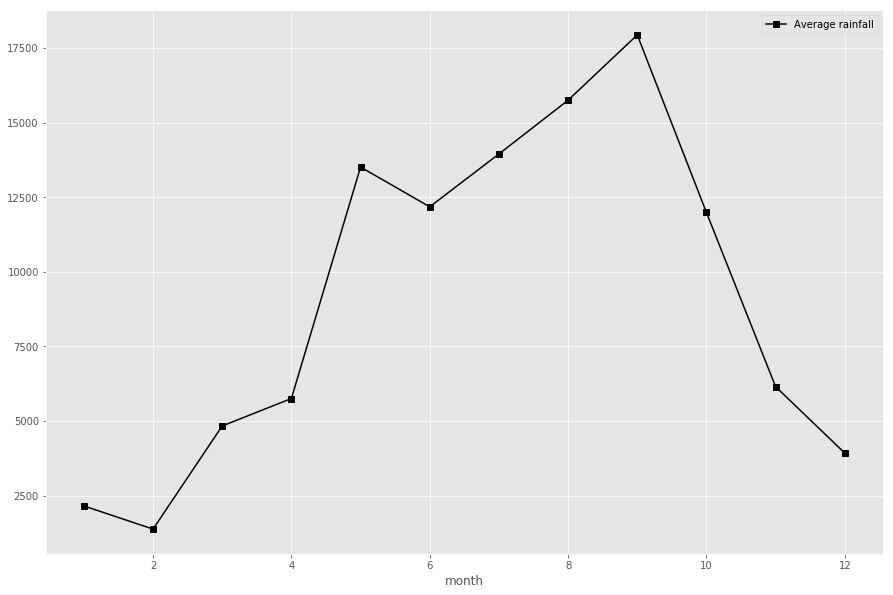

In [60]:
num_years = weather_df["year"].nunique() # group by year and count
rain_per_month = weather_df.groupby("month")["rain"].sum()/num_years ## yearly average
rain_per_month.plot.line(x="month", y="rain", style="sk-", figsize=(15,10), label="Average rainfall")
plt.legend()

### Q: What is the average rainfall in each quarter?

In [61]:
def which_quarter(mo):
    quarter_num = int(1 + mo/4)
    return "Q"+str(quarter_num)
weather_df["quarter"] = weather_df["month"].apply(which_quarter)
rain_per_quarter = weather_df.groupby("quarter")["rain"].sum()/num_years
rain_per_quarter

quarter
Q1     8359.541667
Q2    45384.325000
Q3    51823.225000
Q4     3923.300000
Name: rain, dtype: float64

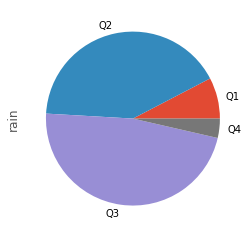

In [62]:
rain_per_quarter.plot(kind='pie')

<div class="alert alert-block alert-warning">
<b>Check out:</b> 
<ul>
<li>Official seaborn tutorial: <a href="https://seaborn.pydata.org/tutorial.html">https://seaborn.pydata.org/tutorial.html</a></li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
How many weather stations are in the dataset?
</div>

In [63]:
weather_df["stncode"].nunique()

67

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
What is the average temperature in Thailand?
</div>

In [64]:
weather_df["meantemp"].mean()

27.567982589224986

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
What is the average temperature of Chiang Rai?
</div>

In [65]:
weather_df[(weather_df["stn_name"]=="Chiang Rai")]["meantemp"].mean()

25.1104038329911

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
Which month has the highest average temperature?
</div>

In [66]:
mean_of_highest = weather_df.groupby('month')['maxtmp'].mean()
mean_of_highest.sort_values()
print("month =", mean_of_highest.idxmax(),", temp =", mean_of_highest.max())

month = 4 , temp = 35.80670801648296


<div class="alert alert-block alert-success">
<b>Your Task:</b> 
Which month has the highest rainfall?
</div>

In [67]:
grouped_by_month = weather_df.groupby("month")
total_rain_per_month = grouped_by_month["rain"].sum()
print("month =", total_rain_per_month.idxmax(),", rainfall =", total_rain_per_month.max())

month = 9 , rainfall = 215254.10000000146


<div class="alert alert-block alert-success">
<b>Your Task:</b> 
Which weather station measures the highest average temperature?
</div>

In [82]:
weather_df.loc[weather_df['meantemp'].idxmax()]

stn_name         Tak
stncode       376201
year            2005
month              5
dday              14
maxtmp            40
mintmp          37.7
rain             3.7
avgrh             62
meantemp        38.8
meantemp_f    101.84
quarter           Q2
Name: 75738, dtype: object

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
Which weather station measures the highest average rainfall?
</div> 

In [105]:
# use "rain" col to find avg. rainfall for each station and find highest
grouped_by_stn_name = weather_df.groupby('stn_name')
total_rain_for_each_stn = grouped_by_stn_name["rain"].sum() # sum rainfall for each station
count_each_stn = grouped_by_stn_name.size() # count the time data collected for each station

def set_avg(stn_name):
    return total_rain_for_each_stn[stn_name]/count_each_stn[stn_name]

weather_df["avg_rainfall"] = weather_df["stn_name"].apply(set_avg) # find avg. rainfall for each station
weather_df.loc[weather_df['avg_rainfall'].idxmax()]

stn_name        Khlong Yai
stncode             501201
year                  2001
month                    1
dday                     1
maxtmp                31.7
mintmp                20.4
rain                     0
avgrh                   64
meantemp                26
meantemp_f            78.8
quarter                 Q1
avg_rainfall       13.6828
Name: 102838, dtype: object

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
In the winter (December-January), which province is coldest?
</div> 

In [108]:
winter_data = weather_df[(weather_df["month"]==12) | (weather_df["month"]==1)]
winter_temp_by_prov = winter_data.groupby("stn_name")["meantemp"].mean()

print("province =", winter_temp_by_prov.idxmin(),", temp =", winter_temp_by_prov.min())

province = Chiang Rai , temp = 20.830779569892467


<div class="alert alert-block alert-success">
<b>Your Task:</b> 
Plot the average temperature (y-axis) vs day number (x-axis)
</div>

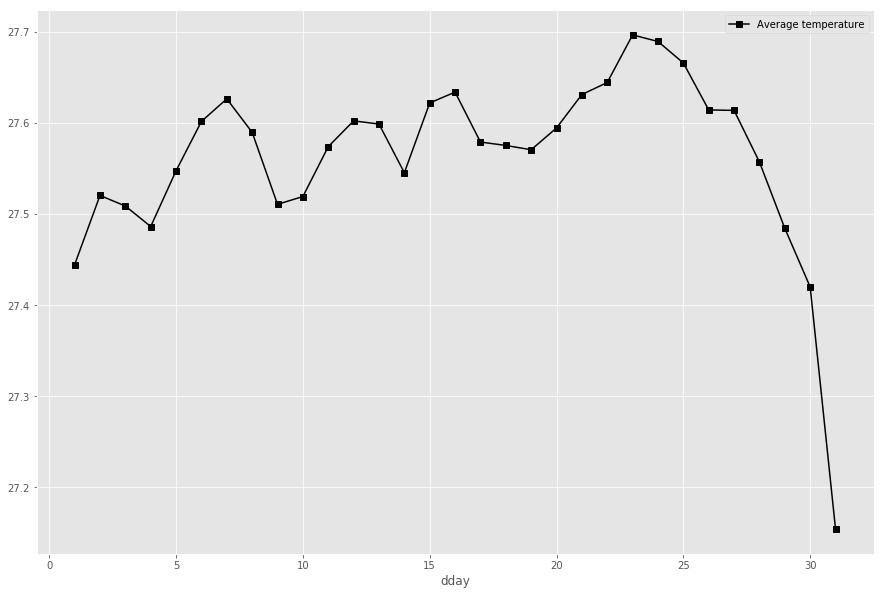

In [119]:
# avg temp for each date from all data
avg_temp_by_date = weather_df.groupby("dday")["meantemp"].mean()
avg_temp_by_date.plot.line(x="day number", y="average temperature", style="sk-", figsize=(15,10), label="Average temperature")
plt.legend()

<div class="alert alert-block alert-success">
<b>Your Task:</b> 
Plot the average temperature of each month.
</div> 

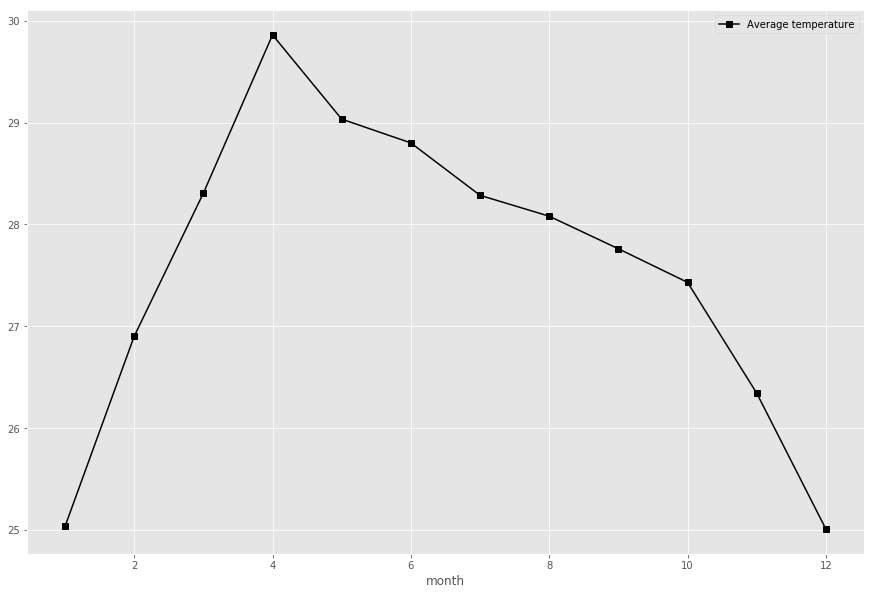

In [120]:
# avg temp for each date from all months and years
avg_temp_by_month = weather_df.groupby("month")["meantemp"].mean()
avg_temp_by_month.plot.line(x="month", y="average temperature", style="sk-", figsize=(15,10), label="Average temperature")
plt.legend()